In [104]:
#Import the libraries for analysis
import pandas as pd
import matplotlib.pyplot as plt



plt.style.use("ggplot")
def make_row(row, row2, df):
    new_row = {}
    for i in ['TotalConn', 'OtherConn', 'Tech_rank', 'Tech_sd', 'NetC_meas', 'NetC_rank', 'NetC_sd', 'bband', 'bband_rank', 'bband_sd', 'bband_meas', 'Dialup']:
        new_row[i] = row[i]
    for i in list(df):
        if row2[i][list(row2.index)[0]] != 'area_code':
            try:
                new_row[i] = float(row2[i][list(row2.index)[0]])
            except ValueError:
                continue
        else:
            new_row[i] = row2[i][list(row2.index)[0]]
    return new_row

def check_row(row, dataframe):
    index = dataframe.ix[dataframe['area_code'] == row['area_code']]
    for i in list(index):
        is_null = 0
        if (index[i][list(index.index)[0]] == 'null'):
            is_null = 1
    if (is_null == 0):    
        d = make_row(row, index, dataframe)
        return d
    else:
        is_null = 0

In [109]:
#Read in CSV Files
internet_df = pd.read_csv("internet.csv")
health_df = pd.read_csv("health.csv")
hospital_df = pd.read_csv("hospital.csv")
chronic_df = pd.read_csv("chronic.csv")


In [110]:
compare_df = pd.DataFrame()

In [111]:
#Make a new dataframe containing area codes that are in both datasets that are not null
for key,row in internet_df.iterrows():
        #    index = health_df.ix[health_df['area_code'] == row['LGA2011']]
        #    #print(index['area_code'])
        #    if (index['health_rate'][list(index.index)[0]] != 'null'):
        #        d = make_row(row, index)
            for i in [health_df, hospital_df, chronic_df]:
                d = check_row(row, i)
                compare_df = compare_df.append(d, ignore_index=True)


        

In [112]:
list(compare_df)

['Dialup',
 'NetC_meas',
 'NetC_rank',
 'NetC_sd',
 'OtherConn',
 'RRMSE',
 'Tech_rank',
 'Tech_sd',
 'TotalConn',
 'area_code',
 'bband',
 'bband_meas',
 'bband_rank',
 'bband_sd',
 'health_count',
 'health_rate',
 'cae_count',
 'cae_rate',
 'cae_sig',
 'can_count',
 'can_rate',
 'cancer_sig',
 'crc_count',
 'crc_rate',
 'crc_sig',
 'digestive_count',
 'digestive_rate',
 'digestive_sig',
 'gen_count',
 'gen_rate',
 'gen_sig',
 'hys_count',
 'hys_rate',
 'hys_sig',
 'infc_count',
 'infc_rate',
 'infc_sig',
 'injury_count',
 'injury_rate',
 'injury_sig',
 'men_count',
 'mental_rate',
 'mental_sig',
 'msc_count',
 'msc_rate',
 'msc_sig',
 'myr_count',
 'myr_rate',
 'myr_sig',
 'preg_count',
 'preg_rate',
 'preg_sig',
 'ren_sig',
 'rsp_count',
 'rsp_rate',
 'rsp_sig',
 'ton_count',
 'ton_rate',
 'ton_sig',
 'total_count',
 'total_fem_count',
 'total_fem_rate',
 'total_fem_sig',
 'total_male_count',
 'total_male_rate',
 'total_male_sig',
 'total_rate',
 'total_sig',
 'arthritis_rate',
 'ar

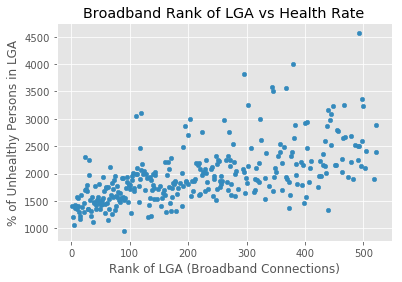

Pearson Correlation:  0.602670727033


In [118]:
d = pd.DataFrame({'internet':compare_df['bband_rank'], 'health':compare_df['rsp_rate']}, columns=['internet', 'health'])
d.plot(kind='scatter', x='internet', y='health')
plt.title("Broadband Rank of LGA vs Health Rate")
plt.xlabel("Rank of LGA (Broadband Connections)")
plt.ylabel("% of Unhealthy Persons in LGA")
plt.show()
print("Pearson Correlation: ", d['internet'].corr(d['health']))